In this course, we'll work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Throughout this course, we'll work to answer the following questions:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

In this mission, we'll start by learning how to aggregate data. Then in the following missions, we'll learn different data cleaning skills that can help us aggregate and analyze the data in different ways. We'll start by learning each topic in isolation, but build towards a more complete data cleaning workflow by the end of the course.

### Introduction to the data.

Let's start by looking at the World Happiness Report for 2015. The data set is a CSV file called World_Happiness_2015.csv. Below are descriptions for some of the columns we'll be working with:

- Country - Name of the country.
- Region - Name of the region the country belongs to.
- Happiness Rank - The rank of the country, as determined by its happiness score.
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- Family - The estimated extent to which family contributes to the happiness score.
- Freedom - The estimated extent to which freedom contributes to the happiness score.
- Generosity - The estimated extent to which generosity contributes to the happiness score.

In [3]:
import pandas as pd
import numpy as np


happiness2015 = pd.read_csv('World_Happiness_2015.csv')

happiness2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Using loops to aggregate data...

First, let's visualize the happiness score of each country in happiness2015:

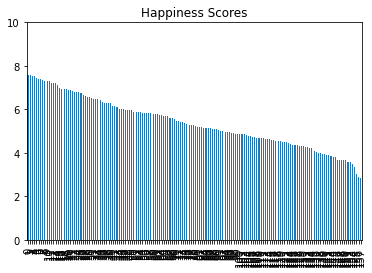

In [4]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the happiness2015 dataframe is assigned to a region, specified in the Region column. We can use the Series.unique() method to confirm the unique regions:

In [5]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let's try plotting just one region next:

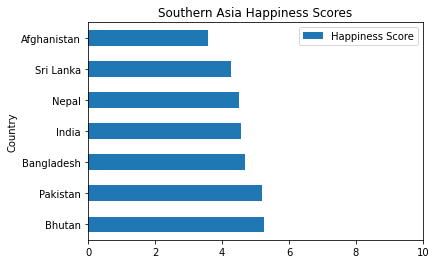

In [6]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

It's much easier to read this visualization - we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region:

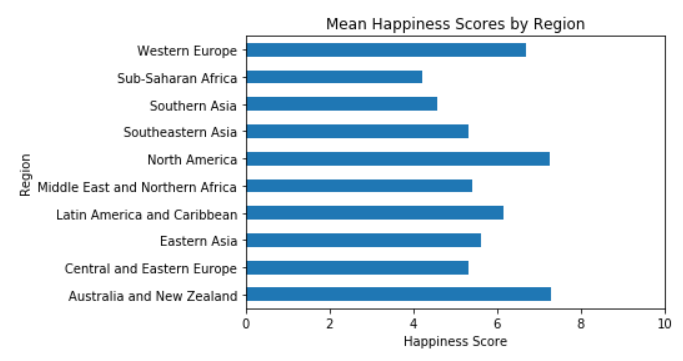

Recall that in the Pandas Fundamentals course, we learned a way to use loops for aggregation. Our process looked like this:

- Identify each unique group in the data set.
- For each group:
    - Select only the rows corresponding to that group.
    - Calculate the average for those rows.

Let's use the same process to find the mean happiness score for each region.

In [7]:
mean_happiness = {}

regions = happiness2015['Region'].unique()

for r in regions:
    region_group = happiness2015[happiness2015['Region'] == r]
    mean_happiness[r] = region_group['Happiness Score'].mean()

## The GroupBy operation.

Let's break down the code we wrote in the previous screen into three steps:

1. Split the dataframe into groups.
2. Apply a function to each group.
3. Combine the results into one data structure.

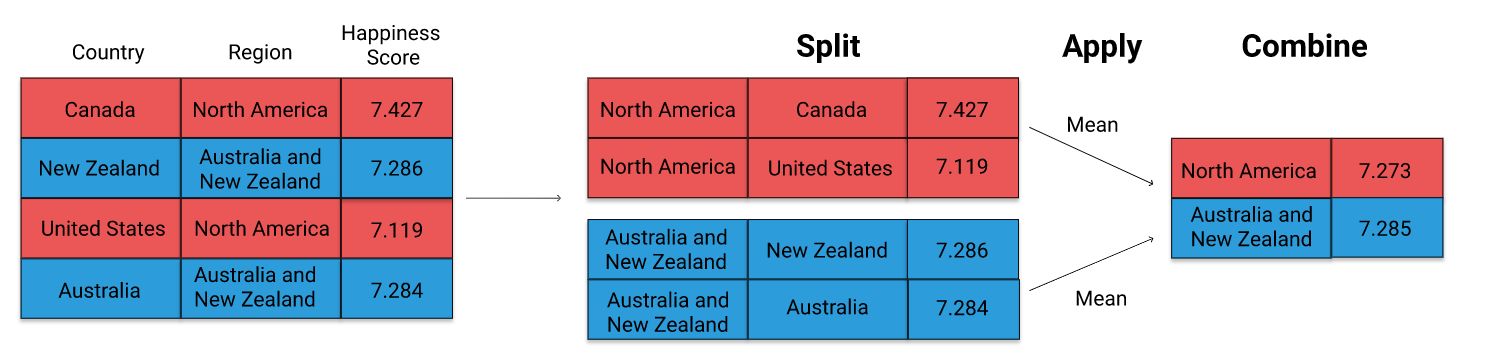

As with many other common tasks, pandas has a built-in operation for this process. The groupby operation performs the **"split-apply-combine"** process on a dataframe, but condenses it into two steps:

1. Create a GroupBy object.
2. Call a function on the GroupBy object.


The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, **but only in an abstract sense**. Nothing is actually computed until a function is called on the GroupBy object.

You can think of the `groupby` operation like this. Imagine a dataframe as a structure made of stacking blocks in all different colors and sizes.

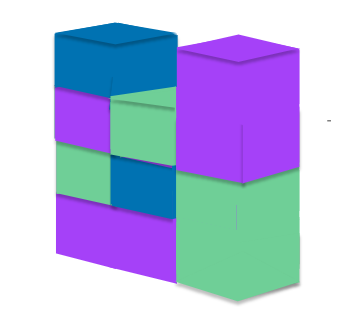

You know you'll eventually want to group the blocks according to color instead, but you don't know yet what you want to do with them after. Using the groupby process, we would first create a mapping document, the GroupBy object, containing information on how to group the blocks by color and where each block is located in the original structure.

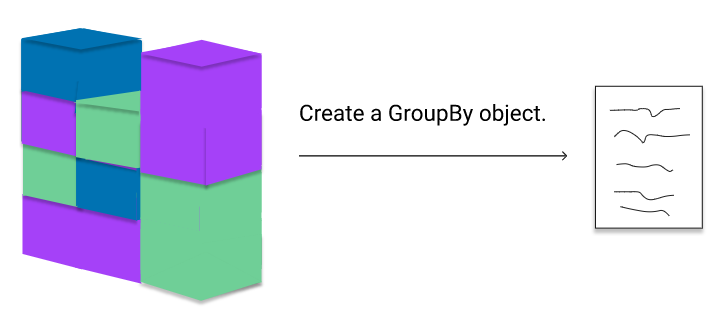

Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. For example, let's say our manager asks us first to build another structure using the biggest block from each color.

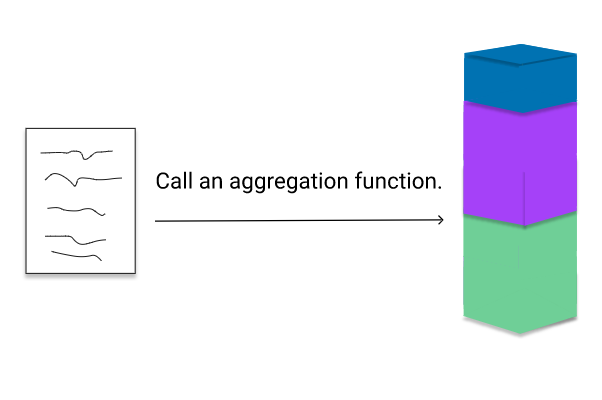

Then, she asks us to build another structure using the block size that appears most frequently in each color.

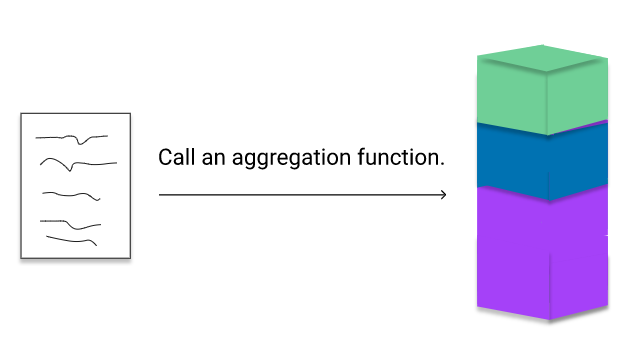

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the groupby operation, we make our code faster, more flexible, and easier to read.

### Creating GroupBy objects.

The first step in the groupby operation is to create a GroupBy object:

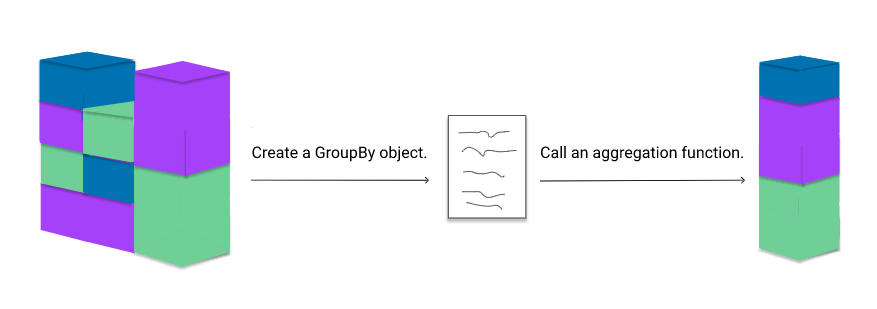

To create a GroupBy object, we use the DataFrame.groupby() method:

```df.groupby('col')```

where col is the column you want to use to group the data set. Note that you can also group the data set on multiple columns by passing a list into the DataFrame.groupby() method. However, for teaching purposes, we'll focus on grouping the data by just one column in this mission.


When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows.

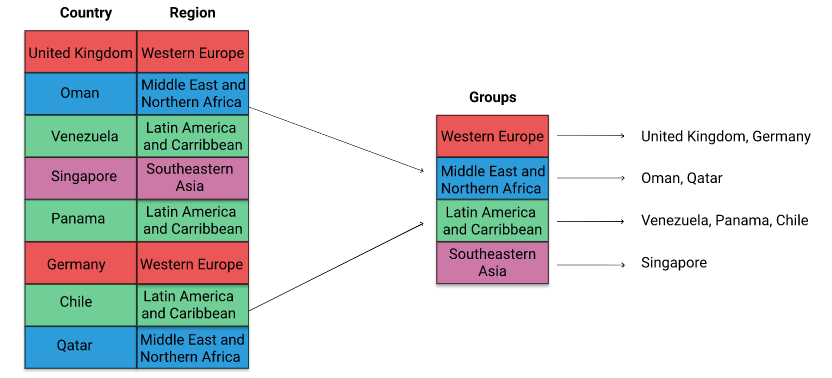

Let's create a Groupby object and group the dataframe by the Region column:

In [8]:
happiness2015.groupby('Region')

Don't be alarmed! This isn't an error. This is telling us that an object of type GroupBy was returned, just like we expected.

Before we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the `GroupBy.get_group()` method to select data for a certain group.

As an example, to select the data for just the North America group, we'd pass 'North America' into the get_group() method as follows:

In [9]:
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


### Exploring GroupBy objects.

We can use the GroupBy.groups attribute to get more information about the GroupBy object:

In [10]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

### Common aggregation methods with GroupBy

Now that we have a good understanding of GroupBy objects, let's use them to aggregate our data. In order to aggregate our data, we must call a function on the GroupBy object.

A basic example of aggregation is computing the number of rows for each of the groups. We can use the `GroupBy.size()` method to confirm the size of each region group:

In [13]:
grouped = happiness2015.groupby('Region')

grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Pandas has built in a number of other common aggregation methods:

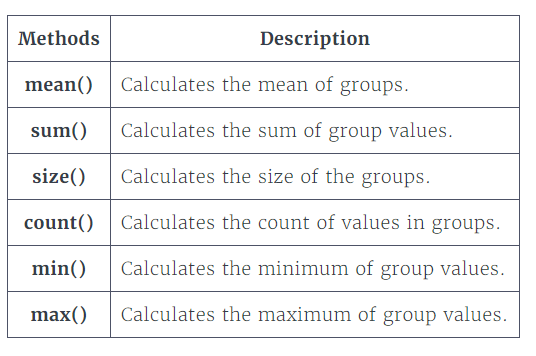

In [15]:
grouped = happiness2015.groupby('Region')

grouped.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


You may have noticed that Region appears in a different row than the rest of the column names. Because we grouped the dataframe by region, the unique values in Region are used as the index. Up until now, we've mostly worked with dataframes with a numeric index.

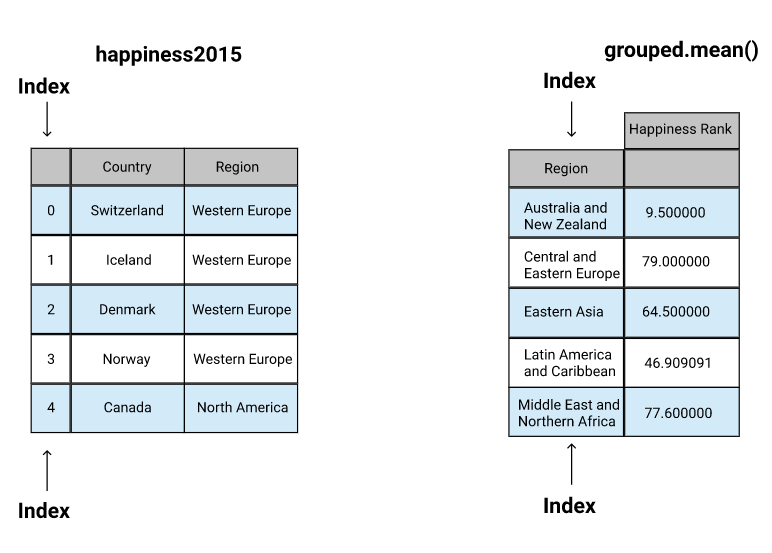

In some cases, we may only wish to aggregate one particular column in the original dataframe. GroupBy objects actually support column indexing, just like dataframes. You can select specific columns for a GroupBy object the same way you would for a dataframe:

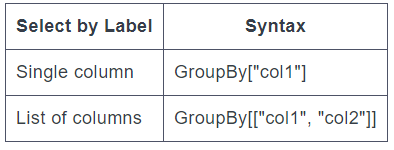

In [17]:
grouped = happiness2015.groupby('Region')

happy_grouped = grouped['Happiness Score']

happy_grouped.mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [19]:
# Shortcut...
grouped['Happiness Score'].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

### The `Agg()` method

What if we wanted to apply more than one kind of aggregation to a column at a time?

For example, suppose we wanted to calculate both the mean and maximum happiness score for each region. Using what we learned so far, we'd have to first calculate the mean, like we did above, and then calculate the maximum separately.

Luckily, however, the `GroupBy.agg()` method can perform both aggregations at once. We can use the following syntax:

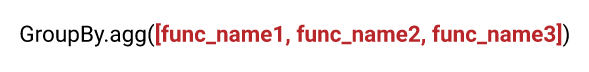

The function names can also be passed in as strings, but we won't cover that explicitly in this mission. You can refer to this documentation for more information on this topic.

In [20]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

def dif(group):
    return (group.max() - group.mean())

happy_grouped.agg([np.mean, np.max])

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [22]:
happy_grouped.agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

### Aggregation with PivotTables

In the last exercise, we tried to predict the results of the code below:

`happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()`

When you printed happiness_means, you should've seen that the values in the Region column are the index of the resulting series and the Happiness Score column contained the values that would be aggregated:

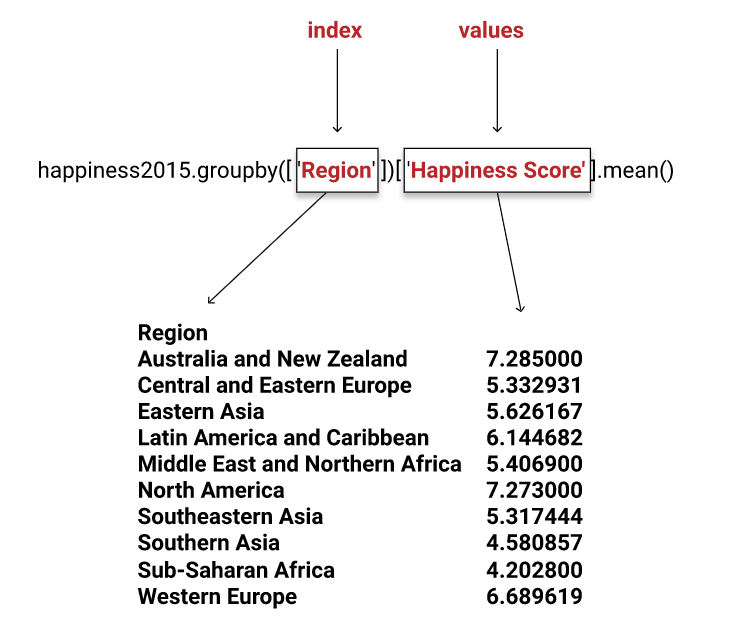


`Index` and `values` are actually arguments used in another method used to aggregate data - **the `DataFrame.pivot_table()` method**. This `df.pivot_table()` method can perform the same kinds of aggregations as the df.groupby method and **make the code for complex aggregations easier to read.**


Below, we use the `df.pivot_table()` method to perform the same aggregation as above.

In [23]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


Keep in mind that this method returns a dataframe, so normal dataframe filtering and methods can be applied to the result. For example, let's use the `DataFrame.plot()` method to create a visualization. Note that we exclude aggfunc below because the mean is the default aggregation function of `df.pivot_table()`.

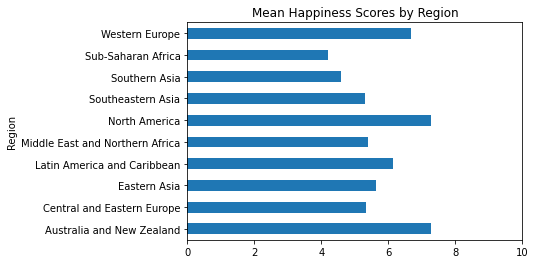

In [24]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

#### using `margins = True`

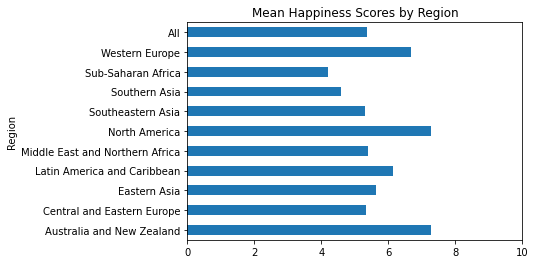

In [27]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', 
                                         index='Region', 
                                         aggfunc=np.mean, 
                                         margins=True)

pv_happiness.plot(kind = 'barh', xlim = (0,10),
                  title = 'Mean Happiness Scores by Region',
                  legend = False)


world_mean_happiness = happiness2015['Happiness Score'].mean()

When we set the `margins` parameter equal to `True`, `All` will be added to the index of the resulting dataframe and the corresponding value will be the result of **applying the aggregation method to the entire column**. In our example, `All`is the mean of the Happiness Score column.

### Aggregating multiple columns and functions with Pivot Tables

The `pivot_table` method also allows us to aggregate multiple columns and apply multiple functions at once.

Below, we aggregate both the 'Happiness Score' and 'Family' columns in happiness2015 and group by the 'Region' column:

In [28]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


To apply multiple functions, we can pass a list of the functions into the aggfunc parameter:

In [29]:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


Let's compare the results returned by the groupby operation and the pivot_table method next.

In [33]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]

happy_family_stats = grouped.agg([np.min, np.max, np.mean])

happy_family_stats

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [32]:
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score','Family'],
                                                  'Region',
                                                  aggfunc = [np.min, np.max, np.mean],
                                                  margins = True)
pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734